# __Workshop 1, Advanced AI - Statistics Module__

## __CHALLENGE: Data management and Descriptive Statistics__

### __Data collection and visualization__

Import the following Python libraries:

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr

You might have to install the pandas_datareader first. The pandas_datareader library has functions to download online data from Yahoo Finance where you can find financial real historical data for stocks, ETFs, cryptocurrencies, etc from most of the financial markets around the world.

Download daily prices for Bitcoin from 2017:

In [3]:
BTC = pdr.get_data_yahoo('BTC-USD',
start="01/01/2017", interval="d")

Show the content of the data:

In [4]:
BTC

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,1003.080017,958.698975,963.658020,998.325012,147775008,998.325012
2017-01-02,1031.390015,996.702026,998.617004,1021.750000,222184992,1021.750000
2017-01-03,1044.079956,1021.599976,1021.599976,1043.839966,185168000,1043.839966
2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,344945984,1154.729980
2017-01-05,1191.099976,910.416992,1156.729980,1013.380005,510199008,1013.380005
...,...,...,...,...,...,...
2022-08-08,24203.689453,23176.546875,23179.527344,23809.486328,28575544847,23809.486328
2022-08-09,23898.615234,22982.000000,23811.484375,23164.318359,23555719219,23164.318359
2022-08-10,24127.414062,22771.519531,23162.898438,23947.642578,32837431722,23947.642578


Python automatically shows you only the first and last rows of the dataset. Now show the last quotations:

In [5]:
BTC.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-08,24203.689453,23176.546875,23179.527344,23809.486328,28575544847,23809.486328
2022-08-09,23898.615234,22982.000000,23811.484375,23164.318359,23555719219,23164.318359
2022-08-10,24127.414062,22771.519531,23162.898438,23947.642578,32837431722,23947.642578
2022-08-11,24822.628906,23900.996094,23948.345703,23957.529297,37127036580,23957.529297
2022-08-12,24078.126953,23680.998047,23966.562500,24021.736328,27942895616,24021.736328


For each period, Yahoo Finance keeps track of the open, high, low, close and adjusted prices. Also, it keeps track of volume that was traded in every period. The adjusted prices are used for stocks, not for currencies. Adjusted prices considered dividend payments and also stock splits.

Then, for the Bitcoin series we can use close price to calculate daily returns.

Import the matplotlib and do a plot for the Bitcoin closing prices:

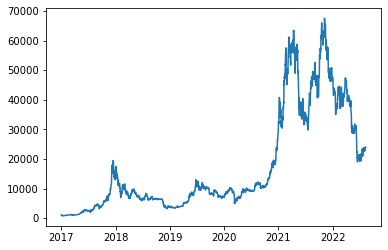

In [6]:
import matplotlib
from matplotlib.pyplot import*
plot(BTC["Close"])
show()

We can check the data types of each variable (column) in the dataset:

In [7]:
BTC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2050 entries, 2017-01-01 to 2022-08-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2050 non-null   float64
 1   Low        2050 non-null   float64
 2   Open       2050 non-null   float64
 3   Close      2050 non-null   float64
 4   Volume     2050 non-null   int64  
 5   Adj Close  2050 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 112.1 KB


### __Data transformations__

We will calculate a) the natural logarithm of prices and b) returns.

The logarithm of prices are very useful for statistical analyis. The return of a price or an investment is the % change of the price from one period to the next.

#### __Return calculation__

A financial simple return for a stock (R_t) is calculated as a percentage change of price from the previous period (t-1) to the present period (t):
$$ R_{t}=\frac{\left(price_{t}-price_{t-1}\right)}{price_{t-1}}=\frac{price_{t}}{price_{t-1}}-1 $$

For example, if the adjusted price of a stock at the end of January 2021 was $100.00, and its previous (December 2020) adjusted price was $80.00, then the monthly simple return of the stock in January 2021 will be:
$$R_{Jan2021}=\frac{price_{Jan2021}}{price_{Dec2020}}-1=\frac{100}{80}-1=0.25$$

We can use returns in decimal or in percentage (multiplying by 100). We will keep using decimals.

In Finance it is very recommended to calculate continuously compounded returns (cc returns) and using cc returns instead of simple returns for data analysis, statistics and econometric models. cc returns are calculated from the natural logarithm of prices.

#### __Reviewing the concept of natural logarithm__

*What is a natural logarithm?*

The natural logarithm of a number is the __exponent__ that the number e (=2.71…) needs to be raised to get another number. For example, let’s name x=natural logarithm of a stock price p. Then:
$$e^x = p$$

The way to get the value of x that satisfies this equality is actually getting the natural log of p:
$$x = log_e(p)$$

Then, we have to remember that the __natural logarithm is actually an exponent that you need to raise the number e__ to get a specific number.

The natural log is the logarithm of base  (=2.71…). The number  is an irrational number (it cannot be expressed as a division of 2 natural numbers), and it is also called the *Euler constant*. Leonard Euler (1707-1783) took the idea of the logarithm from the great mathematician Jacob Bernoulli, and discovered very astonishing features of the  number. Euler is considered the most productive mathematician of all times. Some historians believe that Jacob Bernoulli discovered the number  around 1690 when he was playing with calculations to know how an amount of money grows over time with an interest rate.

How  is related to the grow of financial amounts over time?

Here is a simple example:

If I invest $100.00 with an annual interest rate of 50%, then the end balance of my investment at the end of the first year (at the beginning of year 2) will be:
$$ I_2=100*(1+0.50)^1=150 $$

If the interest rate is 100%, then I would get:
$$ I_2=100*(1+1)^1=200 $$

Then, the general formula to get the final amount of my investment at the beginning of year 2, for any interest rate R can be:
$$ I_2=I_1*(1+R)^1 $$

The (1+R) is the growth factor of my investment.

In Finance, the investment amount is called principal. If the interests are calculated (compounded) each month instead of each year, then I would end up with a higher amount at the end of the year.

Monthly compounding means that a monthly interest rate is applied to the amount to get the interest of the month, and then the interest of the month is added to the investment (principal). Then, for month 2 the principal will be higher than the initial investment. At the end of month 2 the interest will be calculated using the updated principal amount. Putting in simple math terms, the final balance of an investment at the beginning of year 2 when doing monthly compounding will be:
$$ I_2=I_1*\left(1+\frac{R}{N}\right)^{1*N} $$

For monthly compounding, N=12, so the monthly interest rate is equal to the annual interest rate R divided by N (R/N). Then, with an annual rate of 100% and monthly compounding (N=12):
$$ I_2=100*\left(1+\frac{1}{12}\right)^{1*12}=100*(2.613..) $$

In this case, the growth factor is (1 + 1/2)^12, which is equal to 2.613.

Instead of compounding each month, if the compounding is every moment, then we are doing a continuously compounded rate.

If we do a continuously compounding for the previous example, then the growth factor for one year becomes the astonishing Euler constant e:

Let’s do an example for a compounding of each second (1 year has 31,536,000 seconds). The investment at the end of the year 1 (or at the beginning of year 2) will be:
$$ I_2=100*\left(1+\frac{1}{31536000}\right)^{1*31536000}=100*(2.718282..)\cong100*e^1 $$

Now we see that e^1 is the GROWTH FACTOR after 1 year if we do the compounding of the interests every moment!

We can generalize to any other annual interest rate R, so that e^R is the growth factor for an annual nominal rate R when the interests are compounded every moment.

When compounding every instant, we use small r instead of R for the interest rate. Then, the growth factor will be:
$$e_{r}$$

Then we can do a relationship between this growth rate and an effective equivalent rate:
$$ \left(1+EffectiveRate\right)=e^{r} $$

If we apply the natural logarithm to both sides of the equation:
$$ ln\left(1+EffectiveRate\right)=ln\left(e^r\right) $$

Since the natural logarithm function is the inverse of the exponential function, then:
$$ ln\left(1+EffectiveRate\right)=r $$

In the previous example with a nominal rate of 100%, when doing a continuously compounding, then the effective rate will be:
$$ \left(1+EffectiveRate\right)=e^{r}=2.7182 $$
$$ EffectiveRate=e^{r}-1 $$

Doing the calculation of the effective rate for this example:
$$ EffectiveRate=e^{1}-1 = 2.7182.. - 1 = 1.7182 = 171.82\% $$

Then, when compounding every moment, starting with a nominal rate of 100% annual interest rate, the actual effective annual rate would be 171.82%!

#### __Continuously compounded returns__

One way to calculate cc returns is by subtracting the log of the current price (at t) minus the log of the previous price (at t-1):
$$ r_{t}=log(price_{t})-log(price_{t-1}) $$

cc returns are usually represented by small r, while simple returns are represented by capital R.

In Python we can get the previous value of a variable using the shift(n) function. This function works for Panda dataframes. Then we can calculate a new column for the simple returns of Bitcoin as follows:

In [8]:
BTC["R"] = (BTC["Close"] / BTC["Close"].shift(1)) - 1
print(BTC["R"])

Date
2017-01-01         NaN
2017-01-02    0.023464
2017-01-03    0.021620
2017-01-04    0.106233
2017-01-05   -0.122410
                ...   
2022-08-08    0.027339
2022-08-09   -0.027097
2022-08-10    0.033816
2022-08-11    0.000413
2022-08-12    0.002680
Name: R, Length: 2050, dtype: float64


Now we calculate cc returns in a new column using the shift function:

In [9]:
BTC["r"] = np.log(BTC['Adj Close']) - np.log(BTC['Adj Close'].shift(1))
BTCR = BTC[['R','r']].copy()

We have a null value for the first day since we cannot calculate returns for day 1. We can drop the rows with NA values to ease data calculations:

In [10]:
BTC= BTC.dropna()

#### __Descriptive statistics of returns__

We can use the describe function applied to the r column as follows:

In [11]:
sumret = BTC["R"].describe()
sumret

count    2049.000000
mean        0.002416
std         0.041359
min        -0.371695
25%        -0.015882
50%         0.002217
75%         0.020916
max         0.252472
Name: R, dtype: float64

We see that the mean of daily Bitcoin returns is very close to 0 (0.2%), while standard deviation is above 4.1%! The worse day of Bitcoin was about -37.1%! and the best day was 25.2% of return.

To know which days were the worse, we can do a selection based on a condition. Let’s see which days had a daily return less than 15%:

In [12]:
BTC[BTC["R"]<-0.15]

,High,Low,Open,Close,Volume,Adj Close,R,r
Date,,,,,,,,
2017-09-14,3920.600098,3153.860107,3875.370117,3154.949951,2716310016,3154.949951,-0.187411,-0.207530
2018-01-16,13843.099609,10194.900391,13836.099609,11490.500000,18853799936,11490.500000,-0.168548,-0.184582
2018-02-05,8364.839844,6756.680176,8270.540039,6955.270020,9285289984,6955.270020,-0.159688,-0.173982
2020-03-12,7929.116211,4860.354004,7913.616211,4970.788086,53980357243,4970.788086,-0.371695,-0.464730
2022-06-13,26795.589844,22141.257812,26737.578125,22487.388672,68204556440,22487.388672,-0.159747,-0.174053


The worst day for the Bitcoin was March 12, 2020, which is the beginning of the COVID crisis.

To know the best days for Bitcoin:

In [13]:
BTC[BTC["R"]>0.15].sort_values(by=['R'], ascending=False)

,High,Low,Open,Close,Volume,Adj Close,R,r
Date,,,,,,,,
2017-12-07,17899.699219,14057.299805,14266.099609,17899.699219,17950699520,17899.699219,0.252472,0.225119
2017-07-20,2900.699951,2269.889893,2269.889893,2817.600098,2249260032,2817.600098,0.239361,0.214596
2017-12-06,14369.099609,11923.400391,11923.400391,14291.500000,12656300032,14291.500000,0.199283,0.181724
2021-02-08,46203.929688,38076.324219,38886.828125,46196.464844,101467222687,46196.464844,0.187465,0.171821
2020-03-19,6329.735840,5236.968750,5245.416504,6191.192871,51000731797,6191.192871,0.181878,0.167104
2019-04-02,4905.954590,4155.316895,4156.919434,4879.877930,21315047816,4879.877930,0.173560,0.160042
2019-10-25,8691.540039,7479.984375,7490.703125,8660.700195,28705065488,8660.700195,0.155763,0.144761
2017-07-17,2230.489990,1932.619995,1932.619995,2228.409912,1201760000,2228.409912,0.154724,0.143862
2017-09-15,3733.449951,2946.620117,3166.300049,3637.520020,4148069888,3637.520020,0.152956,0.142330


We can also get the main descriptive statistics using specific functions like:

In [14]:
print("The daily average return of Bitcoin is ", BTC["r"].mean())
print("The daily variance of Bitcoin is ", BTC["r"].var())
print("The daily standard deviation (volatility) of Bitcoin return is ", BTC["r"].std())
print("The daily median return of Bitcoin is ",BTC["r"].median())

The daily average return of Bitcoin is  0.001552286721795483
The daily variance of Bitcoin is  0.0017364018412889142
The daily standard deviation (volatility) of Bitcoin return is  0.041670155282755
The daily median return of Bitcoin is  0.0022150257023572095


## __CHALLENGES: Histogram__

- Do a histogram for daily Bitcoin cc returns. Hints: use the plot.hist function for pandas dataframes, and the BTC dataframe.

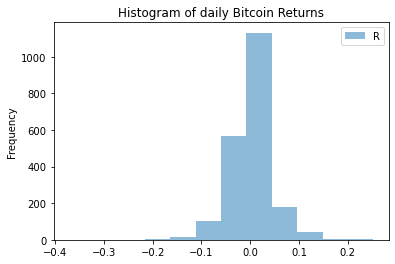

In [15]:
dailyBTC = pd.DataFrame(BTC[["R"]])
histogram = dailyBTC.plot.hist(bins=12,alpha=0.5,title="Histogram of daily Bitcoin Returns")

- Interpret the histogram with your own words and in CAPITAL LETTERS
    
EN EL HISTOGRAMA PODEMOS OBSERVAR QUE EL CRECIMIENTO DEL VALOR DE BITCOIN ES MAYORMENTE DEL 0% AL 5%, SIN EMBARGO SIGUE UNA DISMINUCIÓN EN SU VALOR DE HASTA EL 8%

We use the histogram to visualize random variables with historical values. For expected values of random variables we can use the concept of probability density function, which is analogous to the concept of the histogram, but applied to the expectation of possible values of a random variable.

## __CHALLENGE: Simulating the normal distribution__

Use the mean and standard deviation of the historical cc returns of Bitcoin and simulate the same # of returns as the days we dowloaded in the BTC dataframe.

In one plot show both, the real distribution of historical cc returns and the simulated normal distribution.

DO YOU SEE A DIFFERENCE BEWEEN THE REAL VS THE SIMULATED RETURNS? BRIEFLY EXPLAIN.

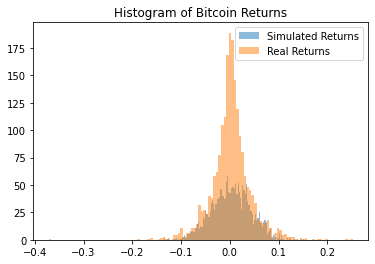

In [16]:
from matplotlib import pyplot as plt

x = pd.DataFrame(BTC[["R"]]).to_numpy()
y = np.random.normal(loc=BTC["R"].mean(), scale=BTC["R"].std(), size=len(BTC))
bins = 120

plt.hist(y, bins, alpha=0.5, label="Simulated Returns")
plt.hist(x, bins, alpha=0.5, label="Real Returns")
plt.legend(loc='upper right')
plt.title("Histogram of Bitcoin Returns")
plt.show()

EN EL HISTOGRAMA PODEMOS OBSERVAR COMO LA DIFERENCIA ENTRE LOS DATOS REALES DEL VALOR DEL BITCOIN QUE TIENE UN CAMBIO MÁS ABRUPTO EN COMPARACIÓN CON LA SIMULACIÓN QUE TIENE UNA MENOR FRECUENCIA DE CAMBIO, LO QUE CAUSA UNA MENOR VARIACIÓN EN LOS DATOS EN LOS DIFERENTES PUNTOS DEL HISTOGRAMA.